In [ ]:
!pip install yfinance

In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib

In [ ]:
!pip install seaborn

## Set up

In [121]:
# Dependencies
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn
import numpy as np

# Display all data frame rows
pd.set_option('display.max_rows', None)
# Prevent view/copy warning
pd.options.mode.chained_assignment = None  # default='warn'

# GME 

## Basic information

In [120]:
gme = yf.Ticker("GME")

# Get stock info (info -> very big, check for potentially important data)
gme_info = gme.info

# Lists of data to print
gme_title_list = ["shortName","symbol","city","state","country","website","phone","sector","industry","fullTimeEmployees","exchangeTimezoneName","exchange","quoteType","longBusinessSummary"]
gme_info_print = ["Name","Symbol","City","State","Country","Website","Phone","Sector","Industry","Number of Employees","Time Zone","Stock Exchange","Quote Type","Summary"]

print("$GME STOCK INFO")
print("--------------")

for i in range(len(gme_title_list)):
    print(gme_info_print[i] + ": " + str(gme_info[gme_title_list[i]]) + '\n')

$GME STOCK INFO
--------------
Name: GameStop Corporation

Symbol: GME

City: Grapevine

State: TX

Country: United States

Website: http://www.gamestop.com

Phone: 817 424 2000

Sector: Consumer Cyclical

Industry: Specialty Retail

Number of Employees: 14000

Time Zone: America/New_York

Stock Exchange: NYQ

Quote Type: EQUITY

Summary: GameStop Corp. operates as a multichannel video game, consumer electronics, and collectibles retailer in the United States, Canada, Australia, and Europe. The company sells new and pre-owned video game platforms; accessories, including controllers, gaming headsets, virtual reality products, and memory cards; new and pre-owned video game software; and in-game digital currency, digital downloadable content, and full-game downloads, as well as network points cards, and prepaid digital and prepaid subscription cards. It also sells collectibles comprising licensed merchandise primarily related to the video game, television, and movie industries, as well as

## Stats 

In [38]:
# Get historical market data
hist = gme.history(period="1mo")
clean_hist = hist.drop(['Dividends', 'Stock Splits'], axis=1)

clean_hist["Daily Change"] = clean_hist['Close'] - clean_hist['Open']

clean_hist["High Low Difference"] = clean_hist['High'] - clean_hist['Low']

clean_hist["After Market Change"] = 0.0
for i in range(len(clean_hist)-1):
    clean_hist["After Market Change"][i+1] = clean_hist["Open"][i+1] - clean_hist["Close"][i]
    
clean_hist

,Open,High,Low,Close,Volume,Daily Change,High Low Difference,After Market Change
Date,,,,,,,,
2021-01-06,17.340000,18.980000,17.330000,18.360001,6056200,1.020000,1.650000,0.000000
2021-01-07,18.469999,19.450001,18.020000,18.080000,6129300,-0.389999,1.430000,0.109999
2021-01-08,18.180000,18.299999,17.080000,17.690001,6464500,-0.490000,1.219999,0.100000
2021-01-11,19.410000,20.650000,19.010000,19.940001,14927600,0.530001,1.639999,1.719999
2021-01-12,19.959999,20.400000,19.320000,19.950001,7060700,-0.009998,1.080000,0.019999
2021-01-13,20.420000,38.650002,20.030001,31.400000,144501700,10.980000,18.620001,0.469999
2021-01-14,38.090000,43.060001,33.049999,39.910000,93717400,1.820000,10.010002,6.690001
2021-01-15,38.490002,40.750000,34.009998,35.500000,46752200,-2.990002,6.740002,-1.419998
2021-01-19,41.549999,45.520000,36.639999,39.360001,74721900,-2.189999,8.880001,6.049999


In [39]:
# Get stats
clean_hist.describe().round(1)

,Open,High,Low,Close,Volume,Daily Change,High Low Difference,After Market Change
count,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0
mean,102.3,127.0,70.8,91.0,70286809.7,-11.3,56.2,13.4
std,116.0,141.3,72.4,97.2,57723484.6,33.0,85.0,65.2
min,17.3,18.3,17.1,17.7,6056200.0,-91.6,1.1,-84.2
25%,24.7,39.2,23.3,32.4,34449400.0,-19.9,5.5,-1.0
50%,42.1,61.1,39.7,48.3,57947800.0,-0.4,23.4,0.1
75%,108.2,156.0,78.7,91.8,89932853.2,1.8,80.3,6.5
max,379.7,483.0,250.0,347.5,196784300.0,59.4,370.8,206.8


## Graphs

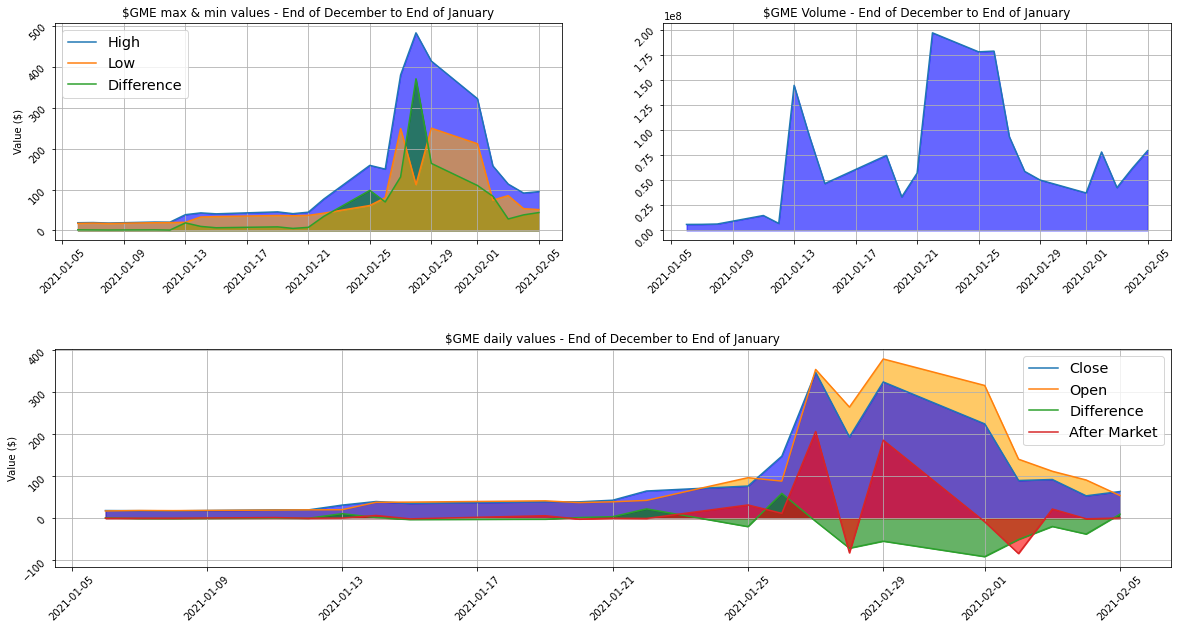

In [40]:
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(2,2)
gs.update(wspace=0.2, hspace=0.5)

ax1=fig.add_subplot(gs[0,0])
ax2=fig.add_subplot(gs[0,1])
ax3=fig.add_subplot(gs[1,:])

ax1.plot(clean_hist["High"],label="High")
ax1.plot(clean_hist["Low"],label="Low")
ax1.plot(clean_hist["High Low Difference"],label="Difference")
ax1.fill_between(clean_hist.index.tolist(),clean_hist["High"],0,color="blue",alpha=0.6)
ax1.fill_between(clean_hist.index.tolist(),clean_hist["High Low Difference"],0,color="green",alpha=0.6)
ax1.fill_between(clean_hist.index.tolist(),clean_hist["Low"],0,color="orange",alpha=0.6)

ax1.set_title("$GME max & min values - End of December to End of January")
ax1.set(ylabel="Value ($)")
ax1.grid()
ax1.legend(fontsize='x-large')
ax1.tick_params(labelrotation=45)

ax2.plot(clean_hist["Volume"])
ax2.fill_between(clean_hist.index.tolist(),clean_hist["Volume"],0,color="blue",alpha=0.6)
ax2.grid()
ax2.set_title("$GME Volume - End of December to End of January")
ax2.tick_params(labelrotation=45)

ax3.plot(clean_hist["Close"],label="Close")
ax3.plot(clean_hist["Open"],label="Open")
ax3.plot(clean_hist["Daily Change"],label="Difference")
ax3.plot(clean_hist["After Market Change"],label="After Market")
ax3.fill_between(clean_hist.index.tolist(),clean_hist["Open"],0,color="orange",alpha=0.6)
ax3.fill_between(clean_hist.index.tolist(),clean_hist["Close"],0,color="blue",alpha=0.6)
ax3.fill_between(clean_hist.index.tolist(),clean_hist["Daily Change"],0,color="green",alpha=0.6)
ax3.fill_between(clean_hist.index.tolist(),clean_hist["After Market Change"],0,color="red",alpha=0.6)

ax3.grid()
ax3.set_title("$GME daily values - End of December to End of January")
ax3.set(ylabel="Value ($)")
ax3.legend(fontsize='x-large')
ax3.tick_params(labelrotation=45)
plt.savefig("meme_stocks_gme",facecolor='w')

In [41]:
# Get major holders
major_holder_df = gme.major_holders
major_holder_df

,0,1
0,27.33%,% of Shares Held by All Insider
1,122.04%,% of Shares Held by Institutions
2,167.96%,% of Float Held by Institutions
3,286,Number of Institutions Holding Shares


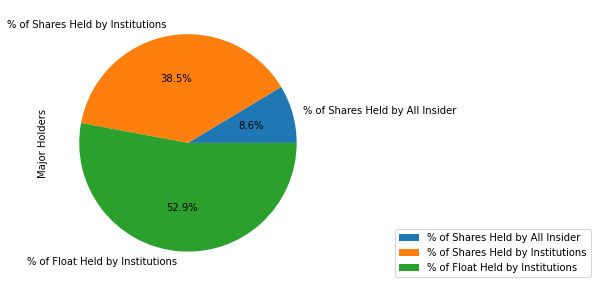

In [42]:
# Formatting
majorclean_df = major_holder_df.drop(3,axis=0)
majorclean_df = majorclean_df.rename(columns={0:'Major Holders'},index={0:majorclean_df[1][0],1:majorclean_df[1][1],2:majorclean_df[1][2]})
majorclean_df = majorclean_df.drop(1,axis=1)

# Drop % symbol but keep the rest of the str, then change dtype to float for plotting
majorclean_df['Major Holders'] = majorclean_df['Major Holders'].str.replace(r'%$','').astype('float')

# Pie plot (manually placing the legend)
majorclean_df.plot.pie(y='Major Holders',autopct='%1.1f%%',figsize=(15,5)).legend(loc='lower right',bbox_to_anchor=(2.0, -0.01))
plt.show()

In [43]:
# Get institutions
institutions = gme.institutional_holders
institutions["Average share price"] = institutions["Value"]/institutions["Shares"]

institutions

,Holder,Shares,Date Reported,% Out,Value,Average share price
0,"FMR, LLC",9534090,2020-09-29,0.1367,97247718,10.20
1,Blackrock Inc.,8600507,2020-09-29,0.1233,87725171,10.20
2,"Vanguard Group, Inc. (The)",5288116,2020-09-29,0.0758,53938783,10.20
3,"Susquehanna International Group, LLP",4444128,2020-09-29,0.0637,45330105,10.20
4,Dimensional Fund Advisors LP,3948114,2020-09-29,0.0566,40270762,10.20
5,Senvest Management LLC,3225740,2020-09-29,0.0462,32902548,10.20
6,State Street Corporation,2609487,2020-09-29,0.0374,26616767,10.20
7,Morgan Stanley,1995842,2020-09-29,0.0286,20357588,10.20
8,"Paradice Investment Management, LLC",1832526,2020-09-29,0.0263,18691765,10.20
9,Norges Bank Investment Management,1811792,2019-12-30,0.0260,11015695,6.08


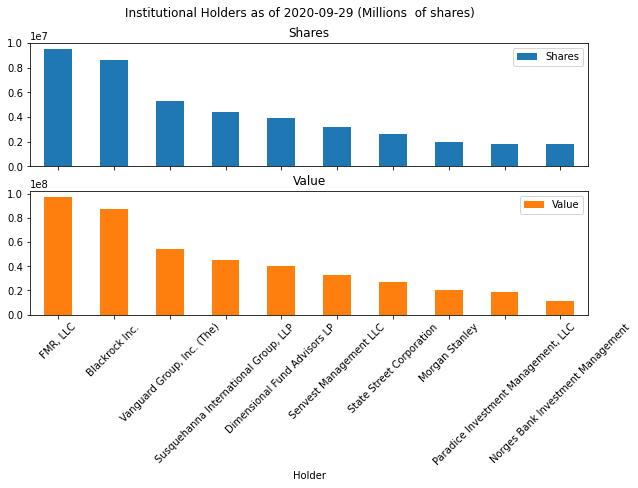

In [44]:
# Generate bar plot
institutions.plot.bar(x="Holder",y=["Shares","Value"],title="Institutional Holders as of 2020-09-29 (Millions  of shares)",subplots=True,figsize=(10,5),rot=45)
plt.show()

In [45]:
# Get firm's recommendations
recom_df = gme.recommendations

# Cutoff date
cutoff = "2020"

# Get dates after cutoff
clean_recom_df = recom_df.loc[recom_df.index >= cutoff]
clean_recom_df

,Firm,To Grade,From Grade,Action
Date,,,,
2020-03-20 11:33:42,Wedbush,Neutral,Outperform,down
2020-06-05 12:19:13,Credit Suisse,Underperform,,main
2020-09-08 16:17:15,Wedbush,Neutral,,main
2020-09-14 09:07:41,Jefferies,Buy,Hold,up
2020-09-14 10:29:57,Telsey Advisory Group,Outperform,Market Perform,up
2020-10-12 09:31:18,Jefferies,Hold,Buy,down
2021-01-25 12:59:56,Telsey Advisory Group,Underperform,Outperform,down
2021-01-27 13:56:33,B of A Securities,Underperform,,main


# AMC

## Basic information

In [46]:
amc = yf.Ticker("AMC")

# Get stock info (info -> very big, check for potentially important data)
amc_info = amc.info

# Lists of data to print
amc_title_list = ["shortName","symbol","city","state","country","website","phone","sector","industry","fullTimeEmployees","exchangeTimezoneName","exchange","quoteType","longBusinessSummary"]
amc_info_print = ["Name","Symbol","City","State","Country","Website","Phone","Sector","Industry","Number of Employees","Time Zone","Stock Exchange","Quote Type","Summary"]

print("$AMC STOCK INFO")
print("--------------")

for i in range(len(amc_title_list)):
    print(amc_info_print[i] + ": " + str(amc_info[amc_title_list[i]]) + '\n')

$AMC STOCK INFO
--------------
Name: AMC Entertainment Holdings, Inc

Symbol: AMC

City: Leawood

State: KS

Country: United States

Website: http://www.amctheatres.com

Phone: 913-213-2000

Sector: Communication Services

Industry: Entertainment

Number of Employees: 3952

Time Zone: America/New_York

Stock Exchange: NYQ

Quote Type: EQUITY

Summary: AMC Entertainment Holdings, Inc., through its subsidiaries, involved in the theatrical exhibition business. The company owns, operates, or has interests in theatres. As of March 17, 2020, it operated approximately 1,000 theatres and 11,000 screens in the United States and internationally. The company was founded in 1920 and is headquartered in Leawood, Kansas. AMC Entertainment Holdings, Inc. is a subsidiary of Dalian Wanda Group Co., Ltd.



## Stats

In [47]:
# Get historical market data
hist = amc.history(period="1mo")
clean_hist_amc = hist.drop(['Dividends', 'Stock Splits'], axis=1)

clean_hist_amc["Daily Change"] = clean_hist_amc['Close'] - clean_hist_amc['Open']

clean_hist_amc["High Low Difference"] = clean_hist_amc['High'] - clean_hist_amc['Low']

clean_hist_amc["After Market Change"] = 0.0
for i in range(len(clean_hist_amc)-1):
    clean_hist_amc["After Market Change"][i+1] = clean_hist_amc["Open"][i+1] - clean_hist_amc["Close"][i]
    
clean_hist_amc

,Open,High,Low,Close,Volume,Daily Change,High Low Difference,After Market Change
Date,,,,,,,,
2021-01-06,2.03,2.230000,1.97,2.01,67363300,-0.020000,0.260000,0.000000
2021-01-07,2.08,2.110000,2.02,2.05,26150500,-0.030000,0.090000,0.070000
2021-01-08,2.09,2.210000,2.07,2.14,39462600,0.050000,0.140000,0.040000
2021-01-11,2.16,2.270000,2.15,2.20,41695800,0.040000,0.120000,0.020000
2021-01-12,2.24,2.390000,2.24,2.29,41784300,0.050000,0.150000,0.040000
2021-01-13,2.33,2.380000,2.13,2.18,45847700,-0.150000,0.250000,0.040000
2021-01-14,2.22,2.320000,2.13,2.18,49638800,-0.040000,0.190000,0.040000
2021-01-15,2.20,2.550000,2.18,2.33,160651300,0.130000,0.370000,0.020000
2021-01-19,2.80,3.200000,2.57,3.06,256276000,0.260000,0.630000,0.470000


In [48]:
# Get stats
clean_hist_amc.describe().round(1)

,Open,High,Low,Close,Volume,Daily Change,High Low Difference,After Market Change
count,22.0,22.0,22.0,22.0,2.200000e+01,22.0,22.0,22.0
mean,6.2,6.8,4.8,5.7,2.740437e+08,-0.5,2.0,0.8
std,5.4,5.8,3.4,4.7,2.835571e+08,1.1,2.8,4.1
min,2.0,2.1,2.0,2.0,2.615050e+07,-3.7,0.1,-7.9
25%,2.2,2.4,2.2,2.2,5.343505e+07,-0.4,0.2,0.0
50%,3.1,3.5,2.8,3.3,1.863674e+08,-0.1,0.7,0.0
75%,8.8,9.5,6.5,7.6,4.410806e+08,0.0,1.8,0.6
max,20.3,20.4,12.9,19.9,1.222342e+09,0.6,10.0,15.4


## Graphs

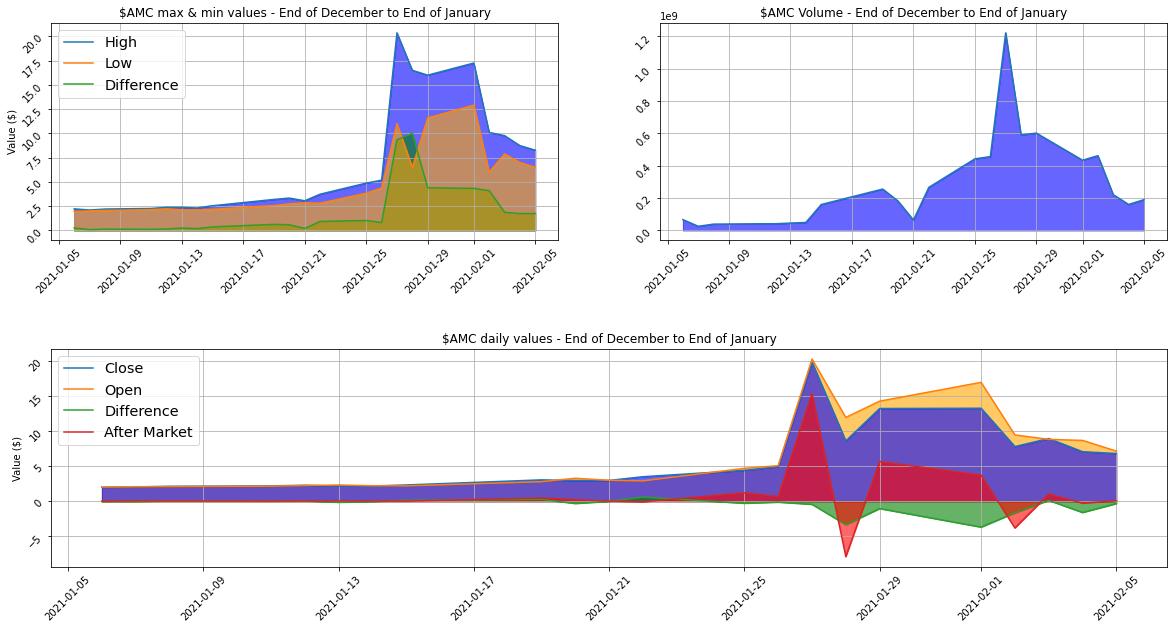

In [49]:
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(2,2)
gs.update(wspace=0.2, hspace=0.5)

ax4=fig.add_subplot(gs[0,0])
ax5=fig.add_subplot(gs[0,1])
ax6=fig.add_subplot(gs[1,:])

ax4.plot(clean_hist_amc["High"],label="High")
ax4.plot(clean_hist_amc["Low"],label="Low")
ax4.plot(clean_hist_amc["High Low Difference"],label="Difference")
ax4.fill_between(clean_hist_amc.index.tolist(),clean_hist_amc["High"],0,color="blue",alpha=0.6)
ax4.fill_between(clean_hist_amc.index.tolist(),clean_hist_amc["High Low Difference"],0,color="green",alpha=0.6)
ax4.fill_between(clean_hist_amc.index.tolist(),clean_hist_amc["Low"],0,color="orange",alpha=0.6)

ax4.set_title("$AMC max & min values - End of December to End of January")
ax4.set(ylabel="Value ($)")
ax4.grid()
ax4.legend(fontsize='x-large')
ax4.tick_params(labelrotation=45)

ax5.plot(clean_hist_amc["Volume"])
ax5.fill_between(clean_hist_amc.index.tolist(),clean_hist_amc["Volume"],0,color="blue",alpha=0.6)
ax5.grid()
ax5.set_title("$AMC Volume - End of December to End of January")
ax5.tick_params(labelrotation=45)

ax6.plot(clean_hist_amc["Close"],label="Close")
ax6.plot(clean_hist_amc["Open"],label="Open")
ax6.plot(clean_hist_amc["Daily Change"],label="Difference")
ax6.plot(clean_hist_amc["After Market Change"],label="After Market")
ax6.fill_between(clean_hist_amc.index.tolist(),clean_hist_amc["Open"],0,color="orange",alpha=0.6)
ax6.fill_between(clean_hist_amc.index.tolist(),clean_hist_amc["Close"],0,color="blue",alpha=0.6)
ax6.fill_between(clean_hist_amc.index.tolist(),clean_hist_amc["Daily Change"],0,color="green",alpha=0.6)
ax6.fill_between(clean_hist_amc.index.tolist(),clean_hist_amc["After Market Change"],0,color="red",alpha=0.6)


ax6.grid()
ax6.set_title("$AMC daily values - End of December to End of January")
ax6.set(ylabel="Value ($)")
ax6.legend(fontsize='x-large')
ax6.tick_params(labelrotation=45)
plt.savefig("meme_stocks_amc",facecolor='w')

In [50]:
# Get major holders
major_holder_df = amc.major_holders
major_holder_df

,0,1
0,2.30%,% of Shares Held by All Insider
1,37.24%,% of Shares Held by Institutions
2,38.11%,% of Float Held by Institutions
3,209,Number of Institutions Holding Shares


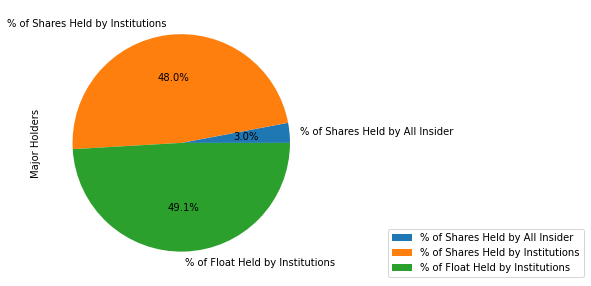

In [51]:
# Formatting
majorclean_df = major_holder_df.drop(3,axis=0)
majorclean_df = majorclean_df.rename(columns={0:'Major Holders'},index={0:majorclean_df[1][0],1:majorclean_df[1][1],2:majorclean_df[1][2]})
majorclean_df = majorclean_df.drop(1,axis=1)

# Drop % symbol but keep the rest of the str, then change dtype to float for plotting
majorclean_df['Major Holders'] = majorclean_df['Major Holders'].str.replace(r'%$','').astype('float')

# Pie plot (manually placing the legend)
majorclean_df.plot.pie(y='Major Holders',autopct='%1.1f%%',figsize=(15,5)).legend(loc='lower right',bbox_to_anchor=(2.0, -0.01))
plt.show()

In [52]:
# Get institutions
institutions = amc.institutional_holders
institutions["Average share price"] = institutions["Value"]/institutions["Shares"]

institutions

,Holder,Shares,Date Reported,% Out,Value,Average share price
0,"Vanguard Group, Inc. (The)",5033343,2020-09-29,0.0175,23707045,4.710000
1,Blackrock Inc.,3674419,2020-09-29,0.0128,17306513,4.710000
2,"Mittleman Investment Management, LLC",2114832,2020-12-30,0.0074,4483443,2.120000
3,"Prudential Financial, Inc.",1770464,2020-09-29,0.0062,8338885,4.710000
4,"Susquehanna International Group, LLP",1638908,2020-09-29,0.0057,7719256,4.710000
5,"Charles Schwab Investment Management, Inc.",1266412,2020-09-29,0.0044,5964800,4.710000
6,State Street Corporation,1156301,2020-09-29,0.0040,5446177,4.709999
7,"Shaw D.E. & Co., Inc.",779462,2020-09-29,0.0027,3671266,4.710000
8,"Geode Capital Management, LLC",755165,2020-09-29,0.0026,3556827,4.710000
9,Northern Trust Corporation,710905,2020-09-29,0.0025,3348362,4.709999


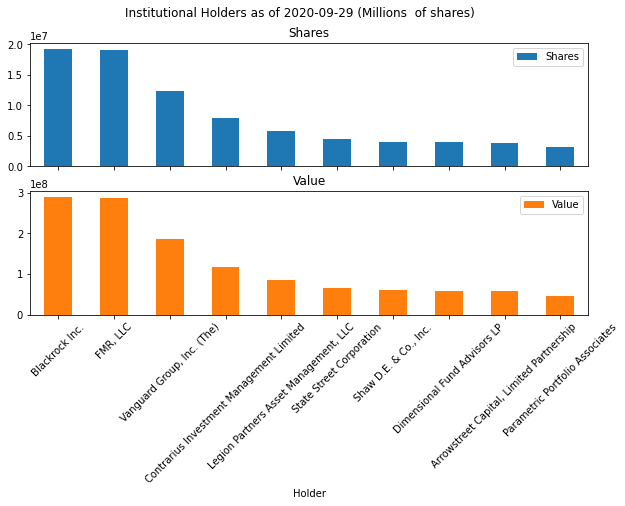

In [122]:
# Generate bar plot
institutions.plot.bar(x="Holder",y=["Shares","Value"],title="Institutional Holders as of 2020-09-29 (Millions  of shares)",subplots=True,figsize=(10,5),rot=45)
plt.show()

In [54]:
# Get firm's recommendations
recom_df = amc.recommendations

# Cutoff date
cutoff = "2020"

# Get dates after cutoff
clean_recom_df = recom_df.loc[recom_df.index >= cutoff]
clean_recom_df

,Firm,To Grade,From Grade,Action
Date,,,,
2020-02-25 13:45:55,Benchmark,Buy,,main
2020-03-16 11:59:22,Benchmark,Hold,Buy,down
2020-03-18 09:46:12,Citigroup,Sell,Buy,down
2020-03-18 09:47:45,B. Riley,Neutral,Buy,down
2020-03-19 09:28:33,Imperial Capital,Outperform,,main
2020-03-20 11:31:46,Wedbush,Neutral,Outperform,down
2020-03-24 13:25:35,Credit Suisse,Neutral,Outperform,down
2020-04-08 11:36:10,Loop Capital,Sell,Hold,down
2020-04-09 10:58:38,MKM Partners,Sell,Neutral,down


# BBBY

## Basic information

In [93]:
bbby = yf.Ticker("BBBY")

# Get stock info (info -> very big, check for potentially important data)
bbby_info = bbby.info

# Lists of data to print
bbby_title_list = ["shortName","symbol","city","state","country","website","phone","sector","industry","fullTimeEmployees","exchangeTimezoneName","exchange","quoteType","longBusinessSummary"]
bbby_info_print = ["Name","Symbol","City","State","Country","Website","Phone","Sector","Industry","Number of Employees","Time Zone","Stock Exchange","Quote Type","Summary"]

print("$BBBY STOCK INFO")
print("--------------")

for i in range(len(bbby_title_list)):
    print(bbby_info_print[i] + ": " + str(bbby_info[bbby_title_list[i]]) + '\n')

$BBBY STOCK INFO
--------------
Name: Bed Bath & Beyond Inc.

Symbol: BBBY

City: Union

State: NJ

Country: United States

Website: http://www.bedbathandbeyond.com

Phone: 908 688 0888

Sector: Consumer Cyclical

Industry: Specialty Retail

Number of Employees: 55000

Time Zone: America/New_York

Stock Exchange: NMS

Quote Type: EQUITY

Summary: Bed Bath & Beyond Inc., together with its subsidiaries, operates a chain of retail stores. The company sells a range of domestics merchandise, including bed linens and related items, bath items, and kitchen textiles; and home furnishings, such as kitchen and tabletop items, fine tabletop, basic housewares, general home furnishings, consumables, and various juvenile products. It also provides various textile products, amenities, and other goods to institutional customers in the hospitality, cruise line, healthcare, and other industries. As of February 29, 2020, the company had 1,500 stores, including 976 Bed Bath & Beyond stores in the United S

## Stats

In [94]:
# Get historical market data
hist = bbby.history(period="1mo")
clean_hist_bbby = hist.drop(['Dividends', 'Stock Splits'], axis=1)

clean_hist_bbby["Daily Change"] = clean_hist_bbby['Close'] - clean_hist_bbby['Open']

clean_hist_bbby["High Low Difference"] = clean_hist_bbby['High'] - clean_hist_bbby['Low']

clean_hist_bbby["After Market Change"] = 0.0
for i in range(len(clean_hist_bbby)-1):
    clean_hist_bbby["After Market Change"][i+1] = clean_hist_bbby["Open"][i+1] - clean_hist_bbby["Close"][i]
    
clean_hist_bbby

,Open,High,Low,Close,Volume,Daily Change,High Low Difference,After Market Change
Date,,,,,,,,
2021-01-06,20.260000,21.570000,20.160000,21.030001,19065700,0.770000,1.410000,0.000000
2021-01-07,17.940001,19.580000,17.750000,18.730000,37425800,0.789999,1.830000,-3.090000
2021-01-08,19.350000,19.520000,18.740000,18.940001,11207400,-0.410000,0.780001,0.620001
2021-01-11,18.719999,20.690001,18.610001,20.490000,16189800,1.770000,2.080000,-0.220001
2021-01-12,20.549999,21.629999,20.200001,21.530001,8798500,0.980001,1.429998,0.059999
2021-01-13,21.500000,24.420000,21.180000,23.020000,19014600,1.520000,3.240000,-0.030001
2021-01-14,23.400000,27.740000,23.400000,27.340000,29231300,3.940001,4.340000,0.379999
2021-01-15,26.889999,27.290001,24.879999,25.600000,13647300,-1.289999,2.410002,-0.450001
2021-01-19,26.100000,26.500000,24.330000,25.030001,9033000,-1.070000,2.170000,0.500000


In [95]:
# Get stats
clean_hist_bbby.describe().round(1)

,Open,High,Low,Close,Volume,Daily Change,High Low Difference,After Market Change
count,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0
mean,27.4,30.6,25.4,27.7,27564543.3,0.3,5.2,-0.0
std,7.3,9.8,5.3,7.5,25566131.4,3.9,5.2,3.6
min,17.9,19.5,17.8,18.7,3817053.0,-7.6,0.8,-11.6
25%,22.0,24.8,21.7,23.5,10125150.0,-1.2,1.9,-0.5
50%,26.3,27.9,25.0,26.7,17836000.0,0.3,3.2,0.0
75%,29.7,33.9,28.2,30.2,35377175.0,1.7,5.4,0.5
max,43.0,53.9,41.1,52.9,90316800.0,9.9,19.4,7.0


## Graphs

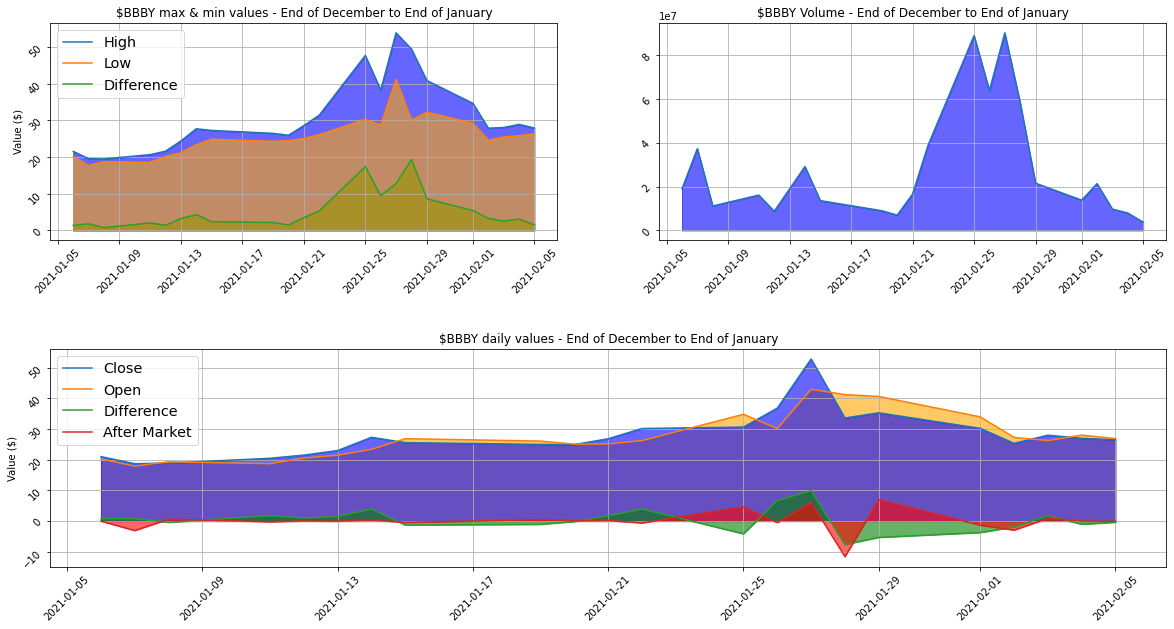

In [96]:
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(2,2)
gs.update(wspace=0.2, hspace=0.5)

ax4=fig.add_subplot(gs[0,0])
ax5=fig.add_subplot(gs[0,1])
ax6=fig.add_subplot(gs[1,:])

ax4.plot(clean_hist_bbby["High"],label="High")
ax4.plot(clean_hist_bbby["Low"],label="Low")
ax4.plot(clean_hist_bbby["High Low Difference"],label="Difference")
ax4.fill_between(clean_hist_bbby.index.tolist(),clean_hist_bbby["High"],0,color="blue",alpha=0.6)
ax4.fill_between(clean_hist_bbby.index.tolist(),clean_hist_bbby["High Low Difference"],0,color="green",alpha=0.6)
ax4.fill_between(clean_hist_bbby.index.tolist(),clean_hist_bbby["Low"],0,color="orange",alpha=0.6)

ax4.set_title("$BBBY max & min values - End of December to End of January")
ax4.set(ylabel="Value ($)")
ax4.grid()
ax4.legend(fontsize='x-large')
ax4.tick_params(labelrotation=45)

ax5.plot(clean_hist_bbby["Volume"])
ax5.fill_between(clean_hist_bbby.index.tolist(),clean_hist_bbby["Volume"],0,color="blue",alpha=0.6)
ax5.grid()
ax5.set_title("$BBBY Volume - End of December to End of January")
ax5.tick_params(labelrotation=45)

ax6.plot(clean_hist_bbby["Close"],label="Close")
ax6.plot(clean_hist_bbby["Open"],label="Open")
ax6.plot(clean_hist_bbby["Daily Change"],label="Difference")
ax6.plot(clean_hist_bbby["After Market Change"],label="After Market")
ax6.fill_between(clean_hist_bbby.index.tolist(),clean_hist_bbby["Open"],0,color="orange",alpha=0.6)
ax6.fill_between(clean_hist_bbby.index.tolist(),clean_hist_bbby["Close"],0,color="blue",alpha=0.6)
ax6.fill_between(clean_hist_bbby.index.tolist(),clean_hist_bbby["Daily Change"],0,color="green",alpha=0.6)
ax6.fill_between(clean_hist_bbby.index.tolist(),clean_hist_bbby["After Market Change"],0,color="red",alpha=0.6)


ax6.grid()
ax6.set_title("$BBBY daily values - End of December to End of January")
ax6.set(ylabel="Value ($)")
ax6.legend(fontsize='x-large')
ax6.tick_params(labelrotation=45)
plt.savefig("meme_stocks_bbby",facecolor='w')

In [97]:
# Get major holders
major_holder_df = bbby.major_holders
major_holder_df

,0,1
0,5.76%,% of Shares Held by All Insider
1,117.88%,% of Shares Held by Institutions
2,125.08%,% of Float Held by Institutions
3,388,Number of Institutions Holding Shares


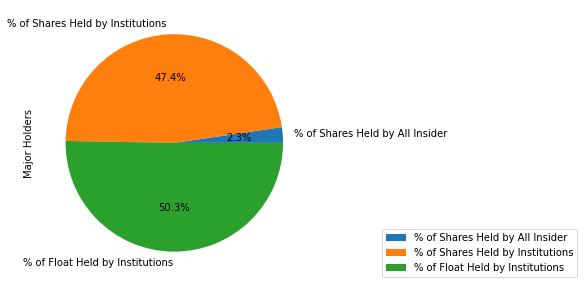

In [98]:
# Formatting
majorclean_df = major_holder_df.drop(3,axis=0)
majorclean_df = majorclean_df.rename(columns={0:'Major Holders'},index={0:majorclean_df[1][0],1:majorclean_df[1][1],2:majorclean_df[1][2]})
majorclean_df = majorclean_df.drop(1,axis=1)

# Drop % symbol but keep the rest of the str, then change dtype to float for plotting
majorclean_df['Major Holders'] = majorclean_df['Major Holders'].str.replace(r'%$','').astype('float')

# Pie plot (manually placing the legend)
majorclean_df.plot.pie(y='Major Holders',autopct='%1.1f%%',figsize=(15,5)).legend(loc='lower right',bbox_to_anchor=(2.0, -0.01))
plt.show()

In [99]:
# Get institutions
institutions = bbby.institutional_holders
institutions["Average share price"] = institutions["Value"]/institutions["Shares"]

institutions

,Holder,Shares,Date Reported,% Out,Value,Average share price
0,Blackrock Inc.,19293929,2020-09-29,0.1592,289023056,14.98
1,"FMR, LLC",19102178,2020-09-29,0.1576,286150626,14.98
2,"Vanguard Group, Inc. (The)",12397394,2020-09-29,0.1023,185712962,14.98
3,Contrarius Investment Management Limited,7874203,2020-09-29,0.0650,117955560,14.98
4,"Legion Partners Asset Management, LLC",5731629,2020-09-29,0.0473,85859802,14.98
5,State Street Corporation,4441653,2020-09-29,0.0366,66535961,14.98
6,"Shaw D.E. & Co., Inc.",4025336,2020-09-29,0.0332,60299533,14.98
7,Dimensional Fund Advisors LP,3918967,2020-09-29,0.0323,58706125,14.98
8,"Arrowstreet Capital, Limited Partnership",3796427,2020-09-29,0.0313,56870476,14.98
9,Parametric Portfolio Associates,3100658,2020-09-29,0.0256,46447856,14.98


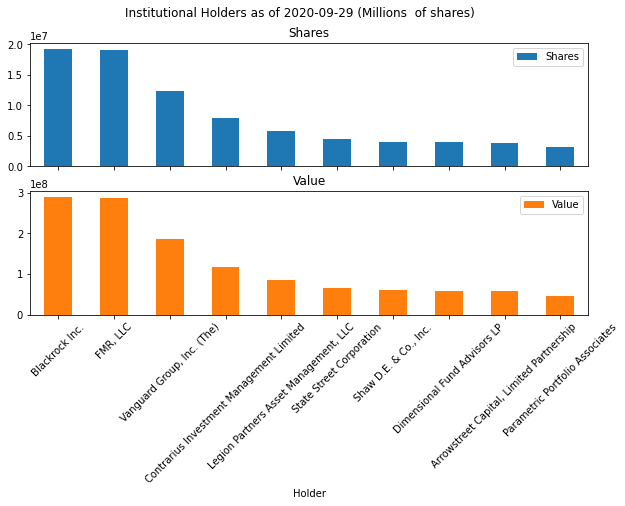

In [100]:
# Generate bar plot
institutions.plot.bar(x="Holder",y=["Shares","Value"],title="Institutional Holders as of 2020-09-29 (Millions  of shares)",subplots=True,figsize=(10,5),rot=45)
plt.show()

In [101]:
# Get firm's recommendations
recom_df = bbby.recommendations

# Cutoff date
cutoff = "2020"

# Get dates after cutoff
clean_recom_df = recom_df.loc[recom_df.index >= cutoff]
clean_recom_df

,Firm,To Grade,From Grade,Action
Date,,,,
2020-01-24 11:32:53,Odeon Capital,Buy,,init
2020-02-12 10:01:56,KeyBanc,Overweight,,main
2020-02-12 12:22:34,Raymond James,Strong Buy,,main
2020-02-12 13:03:40,Loop Capital,Hold,,main
2020-03-20 10:50:42,KeyBanc,Sector Weight,Overweight,down
2020-03-23 17:59:47,Wells Fargo,Underweight,,main
2020-04-16 11:43:21,Raymond James,Strong Buy,,main
2020-04-16 12:32:27,Credit Suisse,Neutral,,main
2020-04-16 18:07:37,CFRA,Sell,,main


# SPY

## Basic information

In [102]:
spy = yf.Ticker("SPY")

# Get stock info (info -> very big, check for potentially important data)
spy_info = spy.info

print("$SPY")
print("--------------")
print(spy_info["longBusinessSummary"])

$SPY
--------------
The investment seeks to provide investment results that, before expenses, correspond generally to the price and yield performance of the S&P 500Â® Index.
 The Trust seeks to achieve its investment objective by holding a portfolio of the common stocks that are included in the index (the âPortfolioâ), with the weight of each stock in the Portfolio substantially corresponding to the weight of such stock in the index.


## Stats

In [103]:
hist = spy.history(period="1mo")
clean_hist_spy = hist.drop(['Dividends', 'Stock Splits'], axis=1)

clean_hist_spy["Daily Change"] = clean_hist_spy['Close'] - clean_hist_spy['Open']

clean_hist_spy["High Low Difference"] = clean_hist_spy['High'] - clean_hist_spy['Low']

clean_hist_spy["After Market Change"] = 0.0
for i in range(len(clean_hist_spy)-1):
    clean_hist_spy["After Market Change"][i+1] = clean_hist_spy["Open"][i+1] - clean_hist_spy["Close"][i]
    
clean_hist_spy

,Open,High,Low,Close,Volume,Daily Change,High Low Difference,After Market Change
Date,,,,,,,,
2021-01-06,369.709991,376.980011,369.119995,373.549988,107997700,3.839996,7.860016,0.000000
2021-01-07,376.100006,379.899994,375.910004,379.100006,68766800,3.000000,3.989990,2.550018
2021-01-08,380.589996,381.489990,377.100006,381.260010,71630100,0.670013,4.389984,1.489990
2021-01-11,377.850006,380.579987,377.720001,378.690002,51176700,0.839996,2.859985,-3.410004
2021-01-12,378.890015,379.859985,376.359985,378.769989,52547700,-0.120026,3.500000,0.200012
2021-01-13,378.690002,380.859985,377.850006,379.790009,45303600,1.100006,3.009979,-0.079987
2021-01-14,380.589996,381.130005,378.100006,378.459991,49989100,-2.130005,3.029999,0.799988
2021-01-15,376.720001,377.579987,373.700012,375.700012,107046400,-1.019989,3.879974,-1.739990
2021-01-19,378.339996,379.230011,376.750000,378.649994,51233300,0.309998,2.480011,2.639984


In [104]:
# Get stats
clean_hist_spy.describe().round(1)

,Open,High,Low,Close,Volume,Daily Change,High Low Difference,After Market Change
count,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0
mean,379.7,381.8,377.4,379.9,68816026.0,0.2,4.5,0.6
std,4.2,3.3,4.7,4.4,26185508.3,2.5,2.1,2.0
min,369.7,376.7,368.3,370.1,42665300.0,-5.8,1.7,-3.6
25%,377.0,379.9,375.9,377.8,50286000.0,-0.6,2.9,-0.1
50%,379.9,381.3,377.4,379.4,57348300.0,0.7,3.9,0.8
75%,382.4,384.6,380.6,383.6,74770725.0,1.7,6.2,2.0
max,388.2,388.5,386.1,387.7,126618400.0,3.8,8.4,3.6


# Comparison

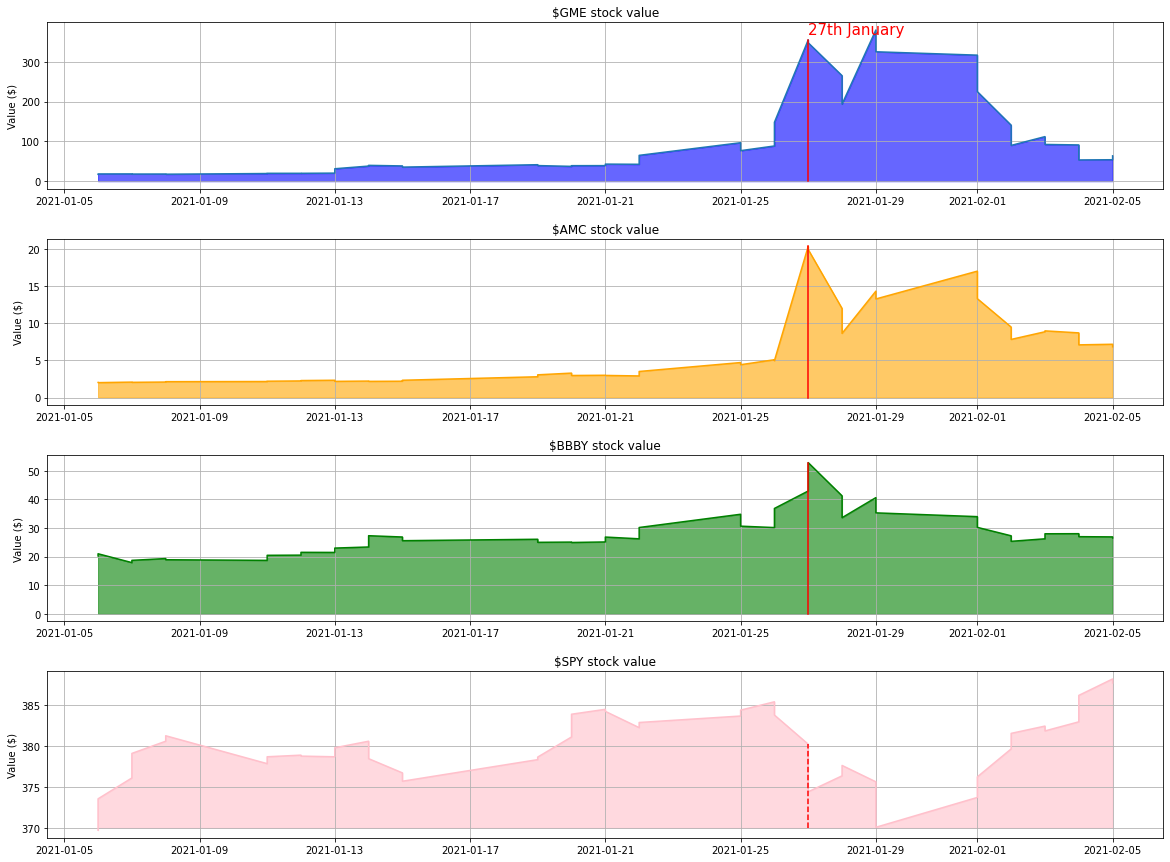

In [119]:
# Declare plot's grid
fig = plt.figure(figsize=(20, 15))
gs = gridspec.GridSpec(4,2)
gs.update(hspace=0.3)

ax7=fig.add_subplot(gs[0,:])
ax8=fig.add_subplot(gs[1,:])
ax9=fig.add_subplot(gs[2,:])
ax10=fig.add_subplot(gs[3,:])

# AMC
open_amc = clean_hist_amc["Open"].tolist()
close_amc = clean_hist_amc["Close"].tolist()
all_amc = [None] * (len(open_amc)+len(close_amc))
all_amc[::2] = open_amc
all_amc[1::2] = close_amc

# GME
open_gme = clean_hist["Open"].tolist()
close_gme = clean_hist["Close"].tolist()
all_gme = [None] * (len(open_gme)+len(close_gme))
all_gme[::2] = open_gme
all_gme[1::2] = close_gme

# BBBY
open_bbby = clean_hist_bbby["Open"].tolist()
close_bbby = clean_hist_bbby["Close"].tolist()
all_bbby = [None] * (len(open_bbby)+len(close_bbby))
all_bbby[::2] = open_bbby
all_bbby[1::2] = close_bbby

# SPY
open_spy = clean_hist_spy["Open"].tolist()
close_spy = clean_hist_spy["Close"].tolist()
all_spy = [None] * (len(open_spy)+len(close_spy))
all_spy[::2] = open_spy
all_spy[1::2] = close_spy

# x axis
dates = clean_hist_amc.index.tolist()                                           
dates_double = [None] * (len(dates)*2)
dates_double[::2] = dates
dates_double[1::2] = dates

# Plots
ax7.plot(dates_double,all_gme)
ax7.plot([dates_double[28],dates_double[28]],[0,all_gme[28]],color='red')

ax8.plot(dates_double,all_amc,color='orange')
ax8.plot([dates_double[28],dates_double[28]],[0,all_amc[28]],color='red')

ax9.plot(dates_double,all_bbby,color='green')
ax9.plot([dates_double[28],dates_double[28]],[0,all_bbby[29]],color='red')

ax10.plot(dates_double,all_spy,color='pink')
ax10.plot([dates_double[28],dates_double[28]],[370,all_spy[28]],color='red',linestyle='dashed')

ax7.fill_between(dates_double,all_gme,0,color="blue",alpha=0.6,label="27th January")
ax8.fill_between(dates_double,all_amc,0,color="orange",alpha=0.6,label="27th January")
ax9.fill_between(dates_double,all_bbby,0,color="green",alpha=0.6,label="27th January")
ax10.fill_between(dates_double,all_spy,370,color="pink",alpha=0.6,label="27th January")

ax7.grid()
ax8.grid()
ax9.grid()
ax10.grid()

ax7.annotate("27th January",(dates_double[28],370),fontsize=15,color="red")

ax7.set_title("$GME stock value")
ax7.set(ylabel="Value ($)")

ax8.set_title("$AMC stock value")
ax8.set(ylabel="Value ($)")

ax9.set_title("$BBBY stock value")
ax9.set(ylabel="Value ($)")

ax10.set_title("$SPY stock value")
ax10.set(ylabel="Value ($)")

plt.savefig("meme_stocks_separated",facecolor='w')

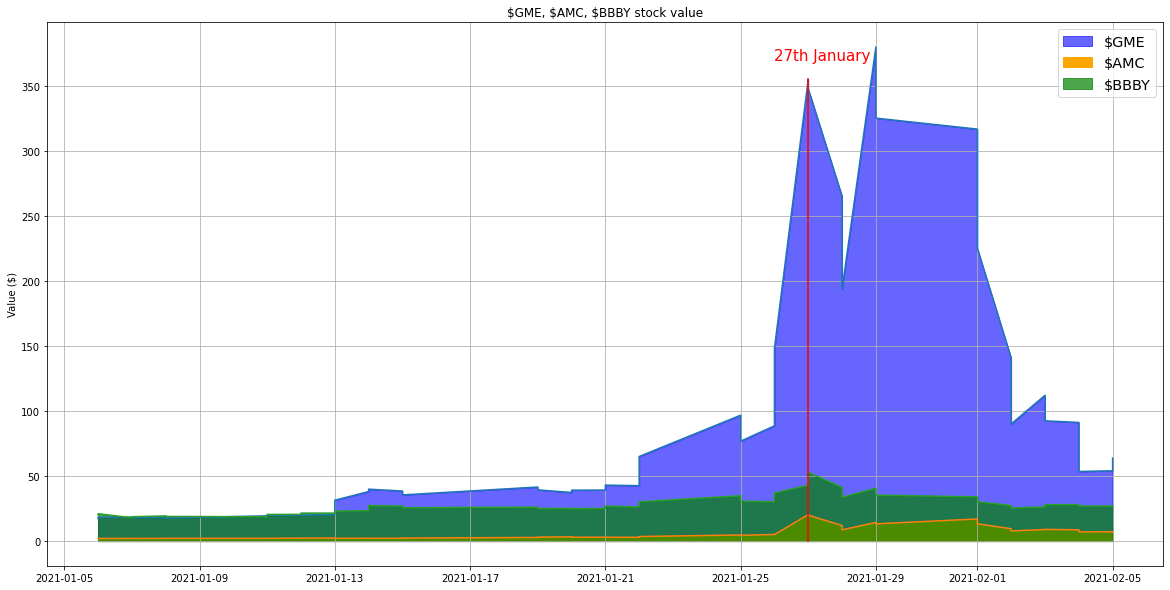

In [70]:
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(1,2)


ax10=fig.add_subplot(gs[0,:])


ax10.plot(dates_double,all_gme)
ax10.plot(dates_double,all_amc)
ax10.plot(dates_double,all_bbby)
ax10.plot([dates_double[28],dates_double[28]],[0,all_gme[28]],color='red')

ax10.fill_between(dates_double,all_gme,0,color="blue",alpha=0.6,label="$GME")
ax10.fill_between(dates_double,all_amc,0,color="orange",alpha=1,label="$AMC")
ax10.fill_between(dates_double,all_bbby,0,color="green",alpha=0.7,label="$BBBY")

ax10.annotate("27th January",(dates_double[27],370),fontsize=15,color="red")

ax10.set_title("$GME, $AMC, $BBBY stock value")
ax10.set(ylabel="Value ($)")
ax10.legend(fontsize='x-large')

ax10.grid()
plt.savefig("meme_stocks_together",facecolor='w')